<a href="https://colab.research.google.com/github/efsacaliskan/assignment1/blob/main/AICamp__Medikal_Maliyet_Analizi_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Medikal Maliyet Analizi

## 1- Gerekli Kütüphanelerin Eklenmesi

In [ ]:
#data manipulasyonu ve keşifçi veri analizi için kütüphaneler eklendi
import numpy as np
import pandas as pd
#data görselleştirilmesi için kütüphaneler eklendi
import seaborn as sns
import matplotlib.pyplot as plt
#veri ön işleme
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#makine öğrenmesi modelleri uygulanması için modeller eklendi
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model değerlendirme
from sklearn.model_selection import cross_val_score,GridSearchCV

In [ ]:
#data dosyasının yüklenmesi
data = pd.read_csv("insurance.csv")

## 2- Keşifsel Veri Analizi

In [ ]:
#verinin 5 satırını görüntüle
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
print(f"Insurance veri setinde {data.shape[0]} tane örnek data ve {data.shape[1]} özellik bulunuyor.")

Insurance veri setinde 1338 tane örnek data ve 7 özellik bulunuyor.


In [ ]:
print(f"Insurance veri setinde özellikler: {list(data.columns)}")

Insurance veri setinde özellikler: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']


In [ ]:
#Eksik veri bulunmuyor
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

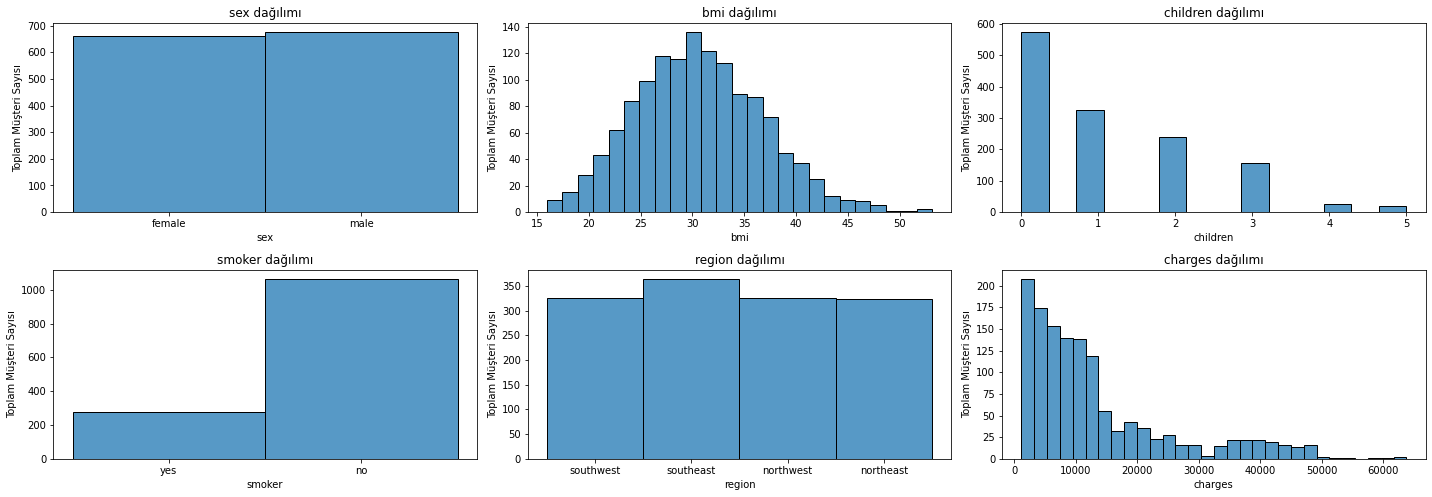

In [ ]:
plt.figure(figsize=(20,10))
for c in range(1,len(data.columns)):
  plt.subplot(3,3,c)
  sns.histplot(data.iloc[:,c])
  plt.title(data.columns[c] +  " dağılımı")
  plt.ylabel("Toplam Müşteri Sayısı")
plt.tight_layout()
plt.show()


Yukarıdaki histogram grafiklerini aşağıdaki gibi yorumlayabiliriz:

1.   Liste öğesi
2.   Liste öğesi



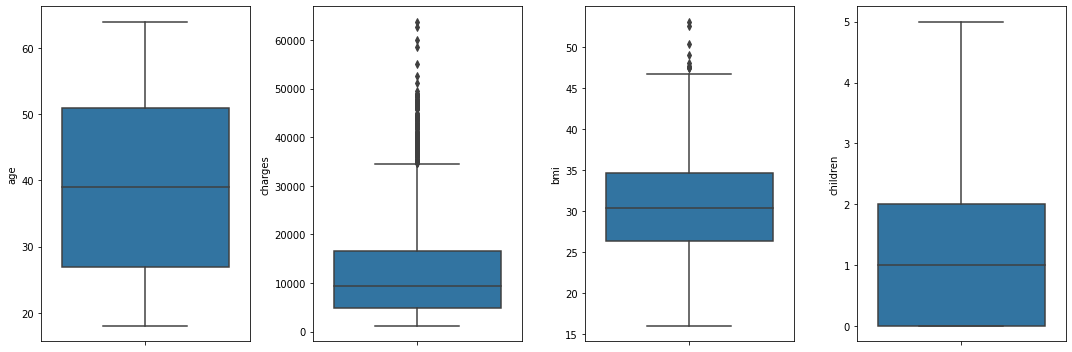

In [ ]:
fig,ax = plt.subplots(1,4,figsize=(15,5),squeeze=False)
sns.boxplot(data=data, y = data.age,ax=ax[0,0])
sns.boxplot(data=data, y = data.charges,ax=ax[0,1])
sns.boxplot(data=data, y = data.bmi,ax=ax[0,2])
sns.boxplot(data=data, y = data.children,ax=ax[0,3])
plt.tight_layout()
plt.show()

Yukarıdaki boxplot grafiklerini aşağıdaki gibi yorumlayabiliriz:

Liste öğesi
Liste öğesi

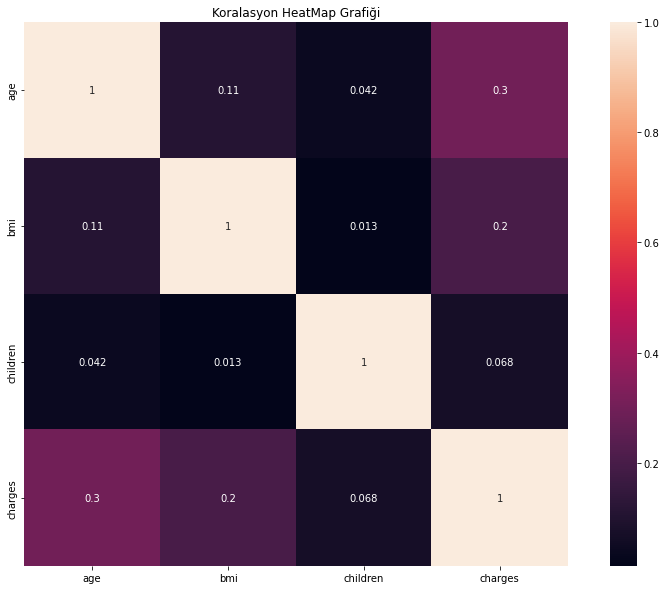

In [ ]:
plt.figure(figsize=(15,10))
plt.title("Koralasyon HeatMap Grafiği")
sns.heatmap(data.corr(),annot=True,square=True)
plt.show()

Yukarıdaki korelasyon heatmap grafiğinden özellikler arasındaki ilişkiler aşağıdaki gibi yorumlayabiliriz:

Liste öğesi
Liste öğesi

In [ ]:
#region analizi
data.groupby("region").agg(["sum","mean","count"])

age                         bmi                  children  \
             sum       mean count        sum       mean count      sum   
region                                                                   
northeast  12723  39.268519   324   9452.215  29.173503   324      339   
northwest  12739  39.196923   325   9489.930  29.199785   325      373   
southeast  14174  38.939560   364  12141.580  33.355989   364      382   
southwest  12823  39.455385   325   9943.900  30.596615   325      371   

                                charges                      
               mean count           sum          mean count  
region                                                       
northeast  1.046296   324  4.343669e+06  13406.384516   324  
northwest  1.147692   325  4.035712e+06  12417.575374   325  
southeast  1.049451   364  5.363690e+06  14735.411438   364  
southwest  1.141538   325  4.012755e+06  12346.937377   325

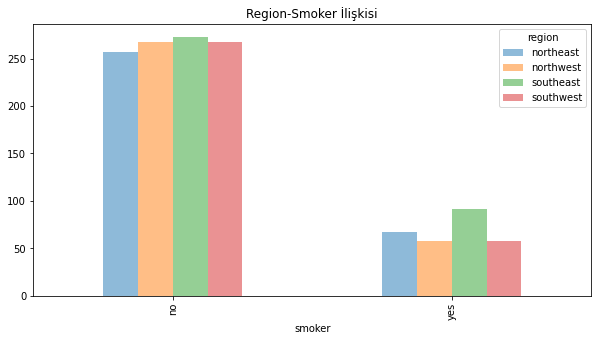

In [ ]:
pd.crosstab(data.smoker,data.region).plot(kind="bar",figsize=(10, 5),alpha=0.5)
plt.title("Region-Smoker İlişkisi")
plt.show()

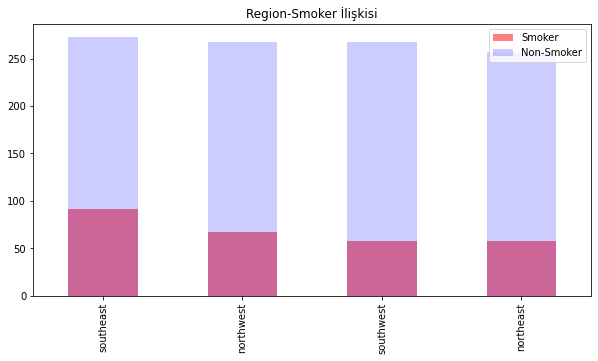

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Region-Smoker İlişkisi")
data[data.smoker=="yes"]["region"].value_counts().plot(kind="bar",color="r",alpha=0.5,label="Smoker")
data[data.smoker=="no"]["region"].value_counts().plot(kind="bar",color="b",alpha=0.2,label="Non-Smoker")
plt.legend()
plt.show()

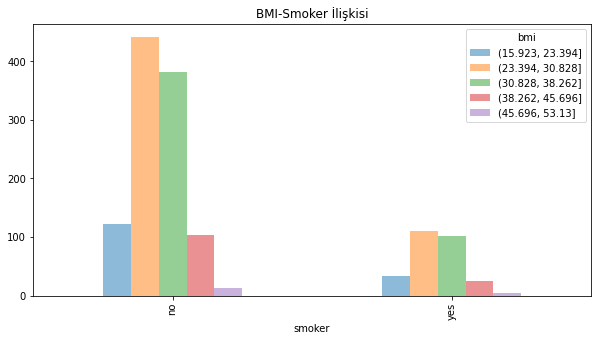

In [ ]:
pd.crosstab(data.smoker,pd.cut(data["bmi"],5)).plot(kind="bar",figsize=(10, 5),alpha=0.5)
plt.title("BMI-Smoker İlişkisi")
plt.show()

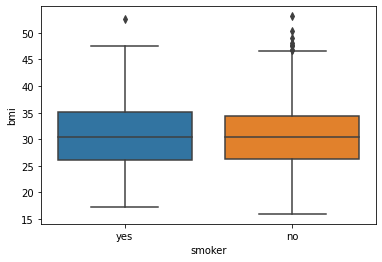

In [ ]:
sns.boxplot(data=data, y = "bmi",x="smoker")

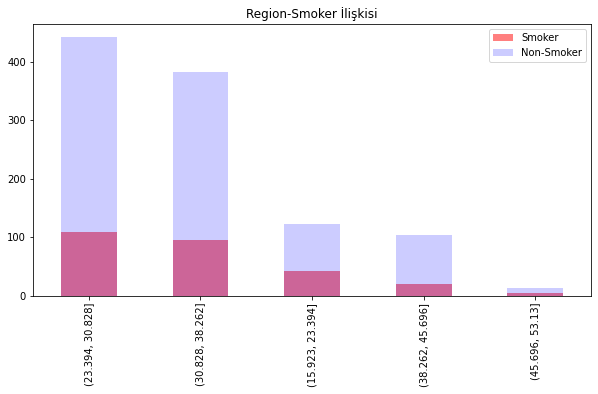

In [ ]:
plt.figure(figsize=(10,5))
plt.title("Region-Smoker İlişkisi")
pd.cut(data[data.smoker=="yes"]["bmi"],5).value_counts().plot(kind="bar",color="r",alpha=0.5,label="Smoker")
pd.cut(data[data.smoker=="no"]["bmi"],5).value_counts().plot(kind="bar",color="b",alpha=0.2,label="Non-Smoker")
plt.legend()
plt.show()

## 3- Veri Ön İşleme

In [ ]:
#eksik veri olmadığını kontrol et
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#mükerrer veri olmadığını kontrol et, 1 tekrarlı veri bulunuyor, tekrarlı veriyi sil
data.duplicated().sum()

1

In [ ]:
#veri ön işleme işlemlerine başlamadan DataFrame'i kopyala, orjinal veri data DataFrame'inde kaalcaktır

In [ ]:
df = data.copy()

In [ ]:
df.drop_duplicates(ignore_index=True,inplace=True)

In [ ]:
#mükerrer veri çıkarıldı
df.duplicated().sum()

0

In [ ]:
#kategorik özellikleri getir
df.select_dtypes("object").columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [ ]:
#'sex', 'smoker', 'region' özellikler kategorik değişkenlerdir

In [ ]:
#2 değer bulunuyor;male-female
df.sex.value_counts()

male      675
female    662
Name: sex, dtype: int64

In [ ]:
#2 değer bulunuyor yes-no
df.smoker.value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [ ]:
#4 değer bulunuyor
df.region.value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [ ]:
#pandas kütüphanesindeki get_dummies metoduyla one-hot encoding yönetimi kullanıldı

In [ ]:
df = pd.get_dummies(df,drop_first=True)

In [ ]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


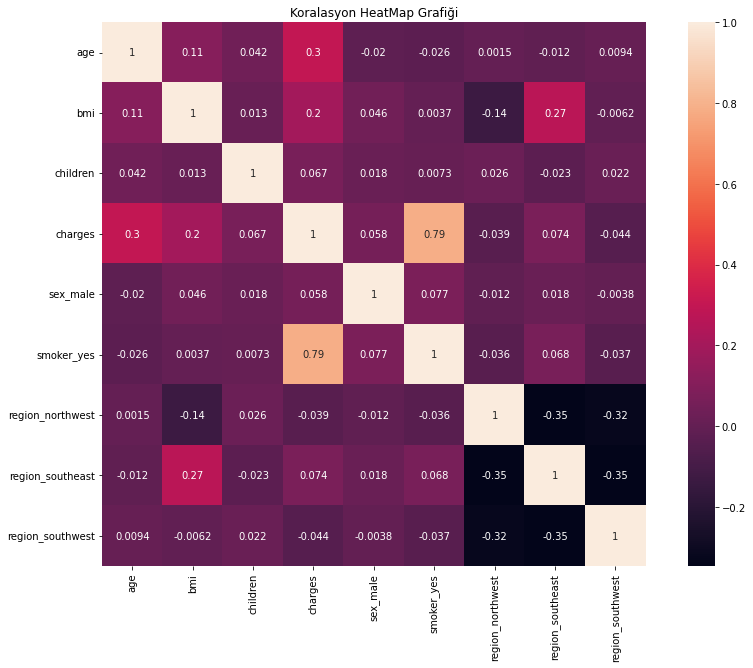

In [ ]:
#kategorik değişkenler nümerik değerlere dönüştürüldükten sonra tüm feature setiyle tekrar heatmap oluşturuldu
plt.figure(figsize=(15,10))
plt.title("Koralasyon HeatMap Grafiği")
sns.heatmap(df.corr(),annot=True,square=True)
plt.show()

Yukarıdaki grafikten açık bir şekilde smoker_yes-charges pozitif korelasyonu görünüyor. (0.79). 

In [ ]:
X= df.drop(["charges"], axis=1)
y = df.charges


In [ ]:
# veriyi train ve test olarak iki parçaya böl
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
#verileri normalize et
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 4- Model Seçme

In [ ]:
#model cross-validation skorlarını tutmak için boş bir dictionary oluştur
models = {
    "Linear Regression":[],
    "Support Vector Regressor":[],
    "Desicion Tree Regressor":[],
    "Random Forest Regressor" :[]
}

In [ ]:
#Linear Regression modelini oluştur ve Cross Validation R2 ve Negative MSE skorlarını ekle
lr = LinearRegression()
lr_r2 = cross_val_score(lr,X_train_scaled,y_train,cv=10).mean()
lr_neg_ms = cross_val_score(lr,X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error').mean()

In [ ]:
models["Linear Regression"]=[]
models["Linear Regression"].append(lr_r2)
models["Linear Regression"].append(lr_neg_ms)

In [ ]:
#Support Vector Regression modelini oluştur ve Cross Validation R2 ve Negative MSE skorlarını ekle
svr = SVR()
svr_r2 = cross_val_score(svr,X_train_scaled,y_train,cv=10).mean()
svr_neg_mse = cross_val_score(svr,X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error').mean()

In [ ]:
models["Support Vector Regressor"]=[]
models["Support Vector Regressor"].append(svr_r2)
models["Support Vector Regressor"].append(svr_neg_mse)

In [ ]:
#Desicion Tree Regression modelini oluştur ve Cross Validation R2 ve Negative MSE skorlarını ekle
dtr = DecisionTreeRegressor()
dtr_R2 = cross_val_score(dtr,X_train_scaled,y_train,cv=10).mean()
dtr_neg_mse = cross_val_score(dtr,X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error').mean()

In [ ]:
models["Desicion Tree Regressor"]=[]
models["Desicion Tree Regressor"].append(dtr_R2)
models["Desicion Tree Regressor"].append(dtr_neg_mse)

In [ ]:
#Random Forest Regression modelini oluştur ve Cross Validation R2 ve Negative MSE skorlarını ekle
rfr = RandomForestRegressor()
rf_R2 = cross_val_score(rfr,X_train_scaled,y_train,cv=10).mean()
rf_neg_mse = cross_val_score(rfr,X_train_scaled,y_train,cv=10,scoring='neg_mean_squared_error').mean()

In [ ]:
models["Random Forest Regressor"]=[]
models["Random Forest Regressor"].append(rf_R2)
models["Random Forest Regressor"].append(rf_neg_mse)

In [ ]:
models

{'Linear Regression': [0.7227220469387354, -37606393.17851404],
 'Support Vector Regressor': [-0.10074750814883408, -150215406.24455917],
 'Desicion Tree Regressor': [0.6455508062442012, -47895187.71166016],
 'Random Forest Regressor': [0.8172586729656661, -25015510.464110408]}

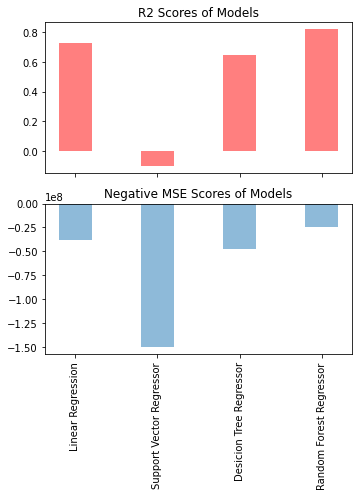

In [ ]:
#Puanları barchart ile gözlemle
X = models.keys()
R2_Scores = [x[0] for x in list(models.values())]
Neg_Mean_Scores = [x[1] for x in list(models.values())]


fig, ax = plt.subplots(2,1,figsize=(5,7),squeeze=False,sharex=True)
plt.title("Scores of Models")
ax[0,0].bar(X,R2_Scores, 0.4 ,color="r", alpha=0.5)
ax[1,0].bar(X,Neg_Mean_Scores,0.4  , alpha=0.5)

ax[0,0].set_title('R2 Scores of Models')
ax[1,0].set_title('Negative MSE Scores of Models')

plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

Ortalama çapraz doğrulama puanlarına göre, **RandomForestRegressor** maksimum R2 puanı ve maksimum negatif MSE puanı ile en iyi performans gösteren modeldir.

**Support Vector Regrossor**, minimum R2 (negatif) ve ayrıca minimum negatif MSE puan ile en kötü modeldir.

## 6- Hiper-parametre Optimizasyonu

Bir önceki bölümde K-Fold Cross Validation ile Random Forest Regressor en iyi performans veren model olarak seçildi. Bu model default parametrelerle oluşturulmuştu.

Bu bölümde Random Forest Regressor modelinin performansını artttırmak için en iyi model parametreleri Grid Search ile aranacaktır.

In [ ]:
rfr_base = RandomForestRegressor()



In [ ]:
params = {
    "n_estimators" : [10,100,200,500],
    "max_depth" : [2,10,100],
    "ccp_alpha" :[0,0.1],  
}

In [ ]:
rfr_tuned = GridSearchCV(rfr_base, params)

In [ ]:
rfr_tuned.fit(X_train_scaled,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'ccp_alpha': [0, 0.1], 'max_depth': [2, 10, 100],
                         'n_estimators': [10, 100, 200, 500]})

In [ ]:
rfr_tuned.best_params_

{'ccp_alpha': 0, 'max_depth': 10, 'n_estimators': 500}

In [ ]:
rfc_final = RandomForestRegressor(ccp_alpha= 0, max_depth= 10, n_estimators= 500)

In [ ]:
rfc_final.fit(X_train_scaled,y_train)

RandomForestRegressor(ccp_alpha=0, max_depth=10, n_estimators=500)

## 7- Modeli Değerlendirme

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_pred = rfc_final.predict(X_test_scaled)

In [ ]:
print("R2 = ", r2_score(y_test,y_pred))

R2 =  0.882777487831545


R2 1 e ne kadar yakın olursa, model o kadar anlamlı süreç üretmiş demektir. 0.88 datanın modele uyum sağladığını belirtmektedir.

In [ ]:
from sklearn.metrics import mean_squared_error
print("Root Mean Squared Error = ", np.sqrt(mean_squared_error(y_test,y_pred)))

Root Mean Squared Error =  4641.157986223391


Root mean squared error ise tahmin edilen ile gerçek değerlerin farkının karelerinin toplamının kara köküdür. Bu değer değerlendirmek için y değerlerinin aralığını da bilmemiz gerekir.

In [ ]:
y.describe()

count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


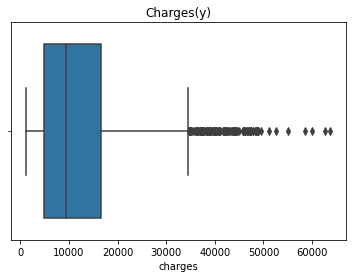

In [ ]:
plt.title("Charges(y)")
sns.boxplot(y)
plt.show()

4636.9 Hata oranı yukarıdaki değerler için fena değildir, ortalama 13279, standart sapması 12110 olan yukarıdaki dağılım için kabul edilebilir bir hata olabilir. 